
# Model eigenvalues and impulse response  

Eigenvalues play a crucial role in the dynamics of models, encapsulating the adjustment process within a model. Their sign and magnitude dictate whether a model will stabilize, diverge after a disturbance, or if such a disturbance will induce oscillations.

For macromodels, which are systems of (non)linear **difference** equations, the initial step involves linearizing the model by computing Jacobi matrices. Since the model may have lags longer than 1 so the linear model can be of an order higher than one, it is transformed into a first-order system by creating a companion matrix. The stability, marginal stability, or instability of the system is assessed based on the eigenvalues of this companion matrix.

The Modelflow library provides a comprehensive set of tools for calculating a model’s eigenvalues, facilitating the assurance of the model's dynamic stability and identifying potential sources of instability.


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')


In [4]:
# Import the model class from the modelclass module 
from modelclass import model 

# functions that improve rendering of modelflow outputs
model.widescreen()
model.scroll_off();

<IPython.core.display.Javascript object>

## Load the model 

In [5]:
mpak,bline = model.modelload('..\models\pak.pcim', 
             alfa=0.8,run=True,keep= 'Baseline',start=2023, end=2100)
mpak.basedf = bline

file read:  C:\modelflow manual\papers\mfbook\content\models\pak.pcim


In [6]:
for oilshock in [0.01 ,5. ,10. ]: 
    oilshockdf = bline.upd(f'<2025> WLDFCRUDE_PETRO + {oilshock}')
    _ = mpak(oilshockdf,2023,2100,keep=f'${oilshock} increase in oil prices 2025',alfa=0.7) 

:::{index} single: modelflow; .newtondiff() method
:::
:::{index} single: modelflow; .eigenvalues_plot() method
:::

:::{index} single: model derivatives
:::

:::{index} single: impulse response
:::

:::{index} single: eigenvalues and eigenvectors
:::

:::{index} single: modelflow; eigenvalues and eigenvectors
:::
## `.eigenvalues_plot()` Display polar diagram of eigenvalues
This is a method to get an overview of the eigenvalues. The .eigenvalues_plot() method first finds all eigenvalues in current time frame, then plots a polar diagram of the eigenvalues for selected years. 

Inspection of the polar diagrams reveals indicates that most of the eigenvalues are less than one, and that those that have imaginary roots (those that appear off of the 0 degree line), only a few are outside of the unit circle, indicating exploding osiliation. However not all years have such values.  which could be a source of model uncertainty (these are hard to see in the figure, but are identified below). However the real values outside the unit circle indicates that the model will have exploding features - more on that later. 
  
:::{note}
Calculation the eigenvalues and corrosponding eigenvectors entails a number of steps: 
 - finding expressions for all partial derivatives with respect to endogeneous variables
 - creating a model to calculate the partial derivatives. 
 - calculate all partial derivatives for all year
 - use the calculated partial derivatives to construct a companion matrix for all year
 - calculate the eigenvalues and eigenvectors. 
 
 In modelflow these steps are performed in a special class `newton_diff`- as is was constructed to enable solving the model using the newton method. When eigenvalues has been calculated once for a model the results are stores in 
a instance of this class `.stability_newton`and the calculations are not repeated every time the eigenvalues are used. 
:::

Finding eigenvalues and vectors


Invert (I-A):   0%|          | 0/78 [00:00<?, ?it/s]

Calculate  Eigenvalues:   0%|          | 0/78 [00:00<?, ?it/s]

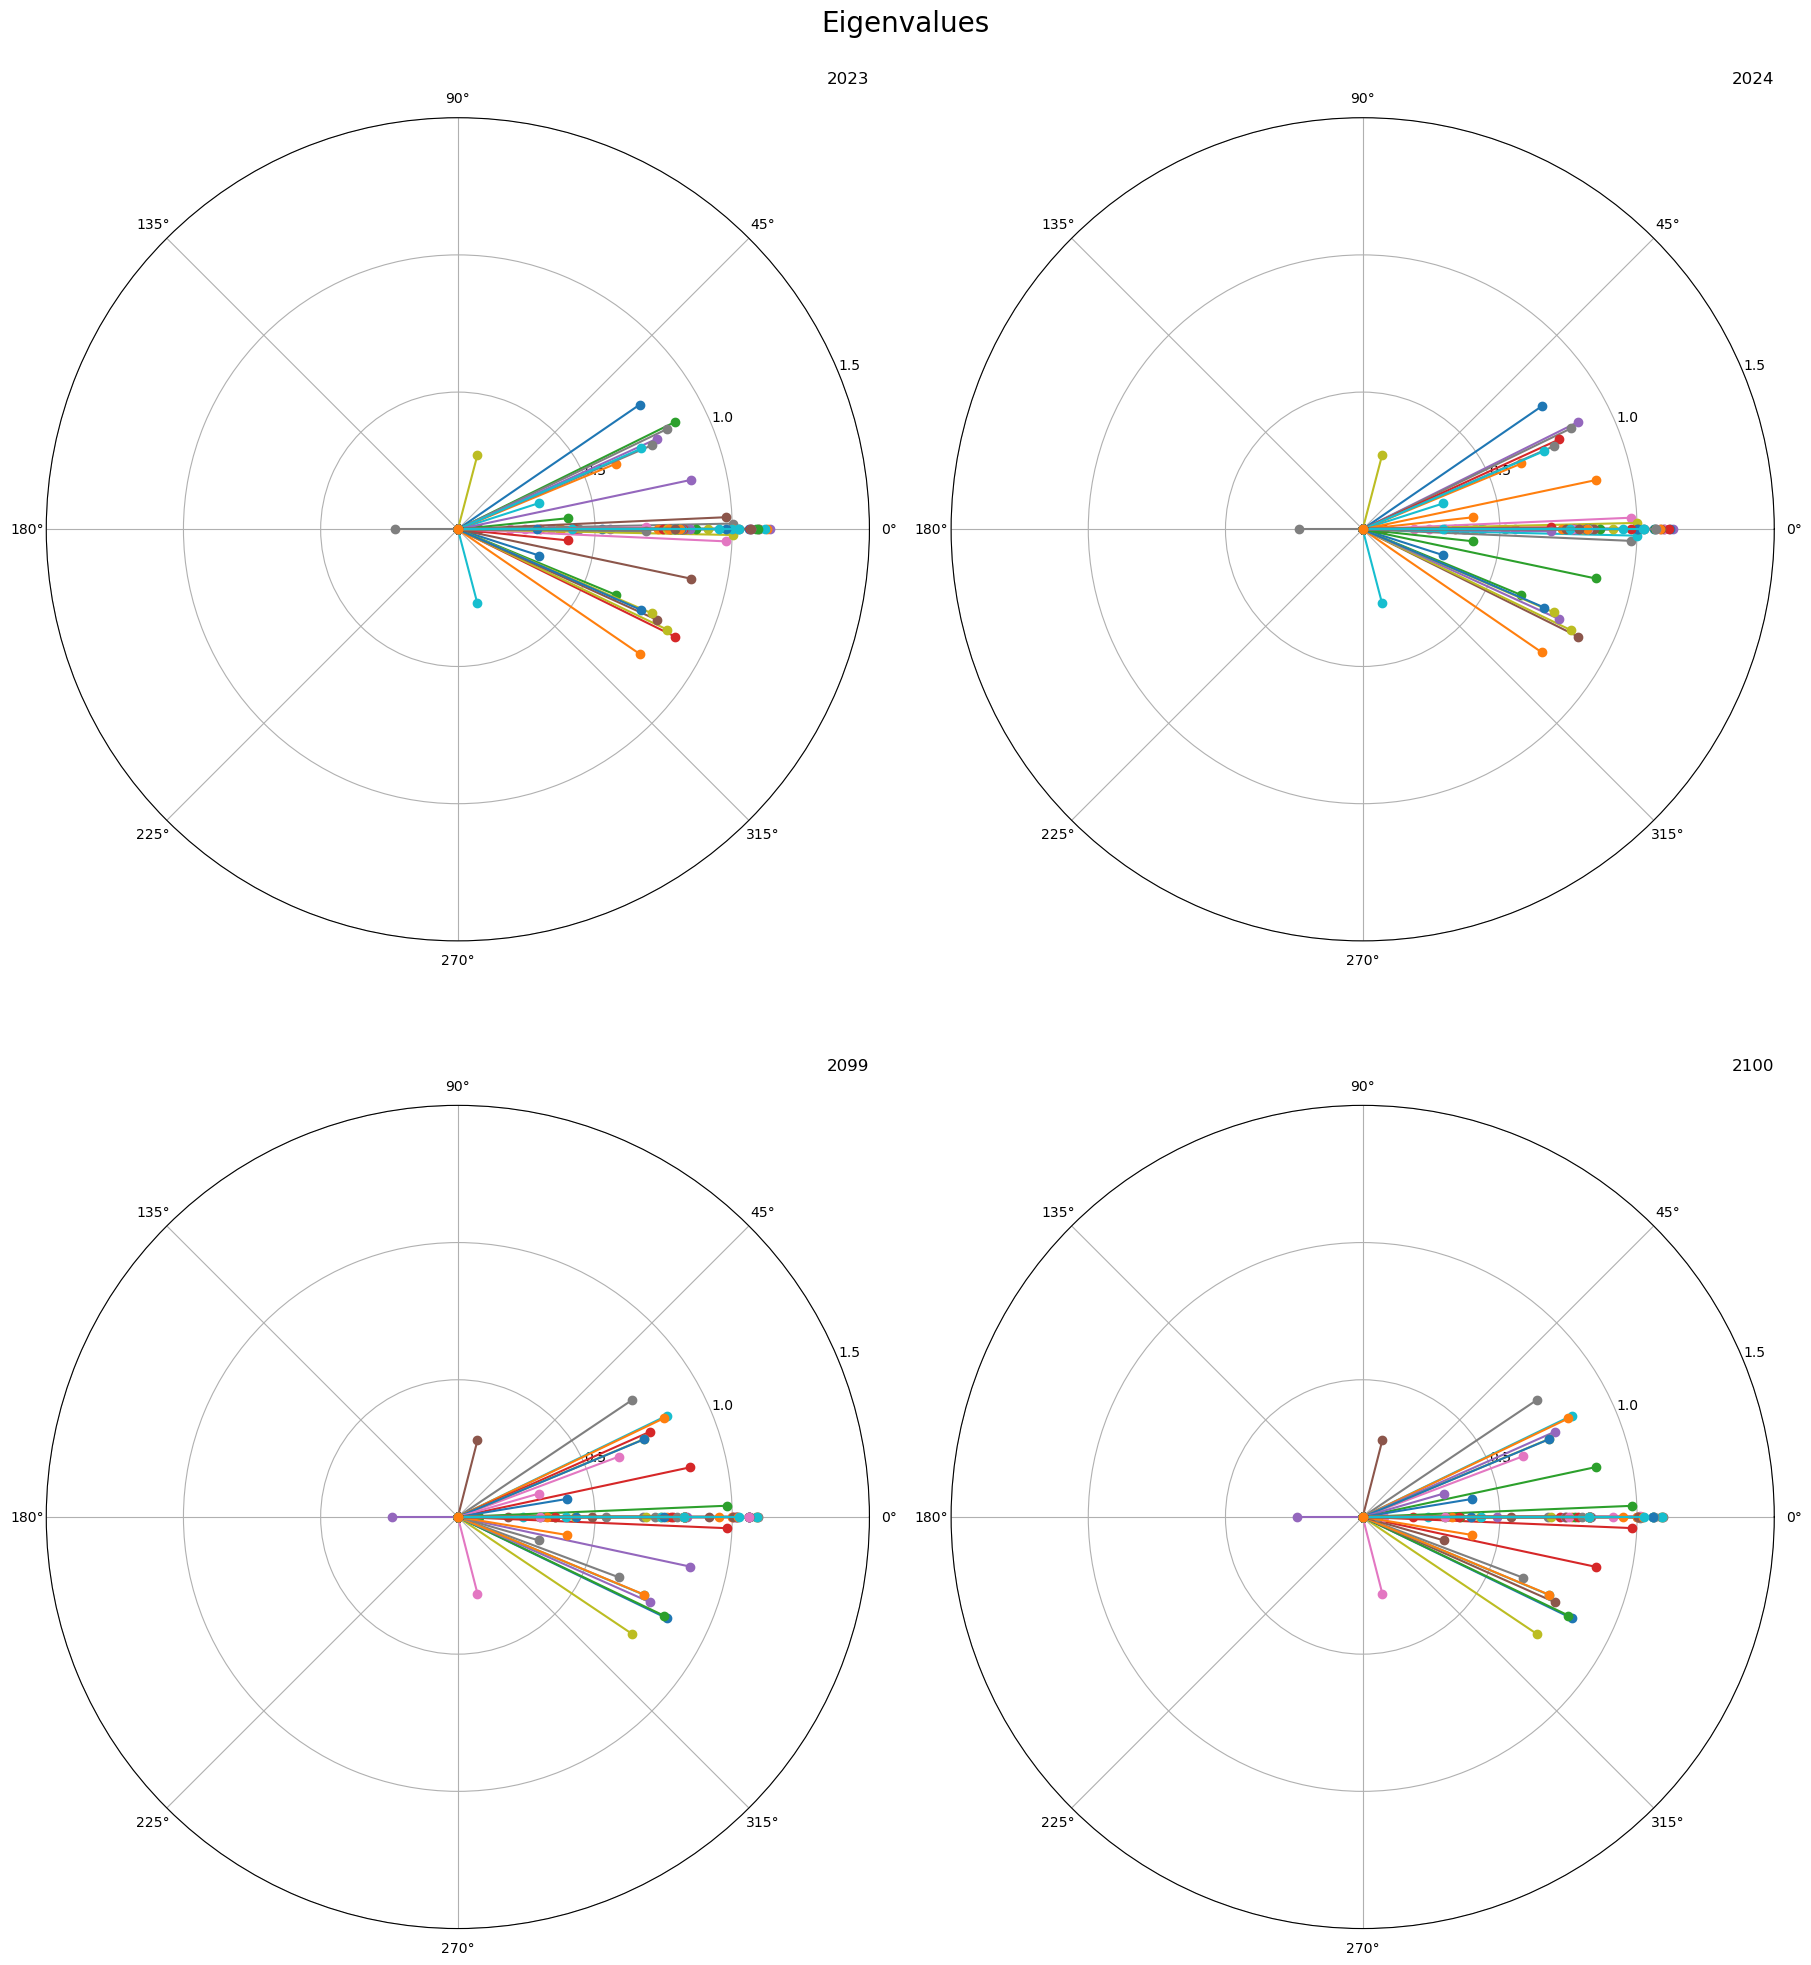

In [7]:
fig = mpak.eigenvalues_plot(periode=[2023,2024,2099,2100]);

```{note}
fig can be exportet to file with:
 >fig.savefile('polar.pdf')  
 
If another format then pdf is needed, `.pdf` can be changed to ´.svg|.png|.eps|.jpeg´.
```


Inspection of the polar diagrams reveals indicates for Pakistan model: 
 - Real eigenvalues larger than 1, suggesting an exploding response to shocks. 
 - There are instances where the eigenvalues indicate a response that is both exploding and oscillating. 

 Nevertheless, for the explosion and oscillation effects to be significant, they need to persist over several years, which means the occasional occurrences might not have substantial effects.

## the method `.eigenvalues_show()` Interactive exploration of eigenvalues and vectors

To enable closer analysis the `.eigenvalues_show()` function provides a interactive interface to the analysis of models eigenvalues and vectors. It will   generate and display a polar plot of eigenvalues and their corresponding eigenvectors
        for a selected year. 
        The user can interact with the plot via a dropdown for year selection, a slider for eigenvalue
        selection, and a button to toggle additional plot details. The polar plot dynamically updates
        to reflect the selected eigenvalue, displaying its magnitude and phase. Additional information
        about the selected eigenvector is also displayed, facilitating a detailed temporal analysis
        of the eigenvalues.

by pushing the `open plot widget` button a widget to look at the impulse response for the variables which 
contributes with weights in the eigenvector corosponding to the selected eigenvalue.  
    


In [8]:
mpak.eigenvalues_show() 

```{image} eigenvalue_show.png
    :alt: interactive eigenvalues 
    :class: bg-primary mb-1
    :width: 80%
    :align: center
```    

The plot widget 

```{image} showwidget.png
    :alt: interactive eigenvalues 
    :class: bg-primary mb-1
    :width: 80%
    :align: center
```    

The impulse response for the one variable in the first Eigenvector

```{image} chart.png
    :alt: interactive eigenvalues 
    :class: bg-primary mb-1
    :width: 80%
    :align: center
```    

## Impulse response 
The impulse response can be visualized with the `.keep_plot` function. 
Below, observe the impulse response for selected variables. Initially, we present the response for the maximum projection period to illustrate long-term behavior, followed by a shorter period to highlight oscillations in the short run.

For many variables, the response amplifies over the long run, consistent with real eigenvalues above 1. Similarly, some variables show a diminishing oscillation, corresponding with the presence of eigenvalues with imaginary components.

### Long run

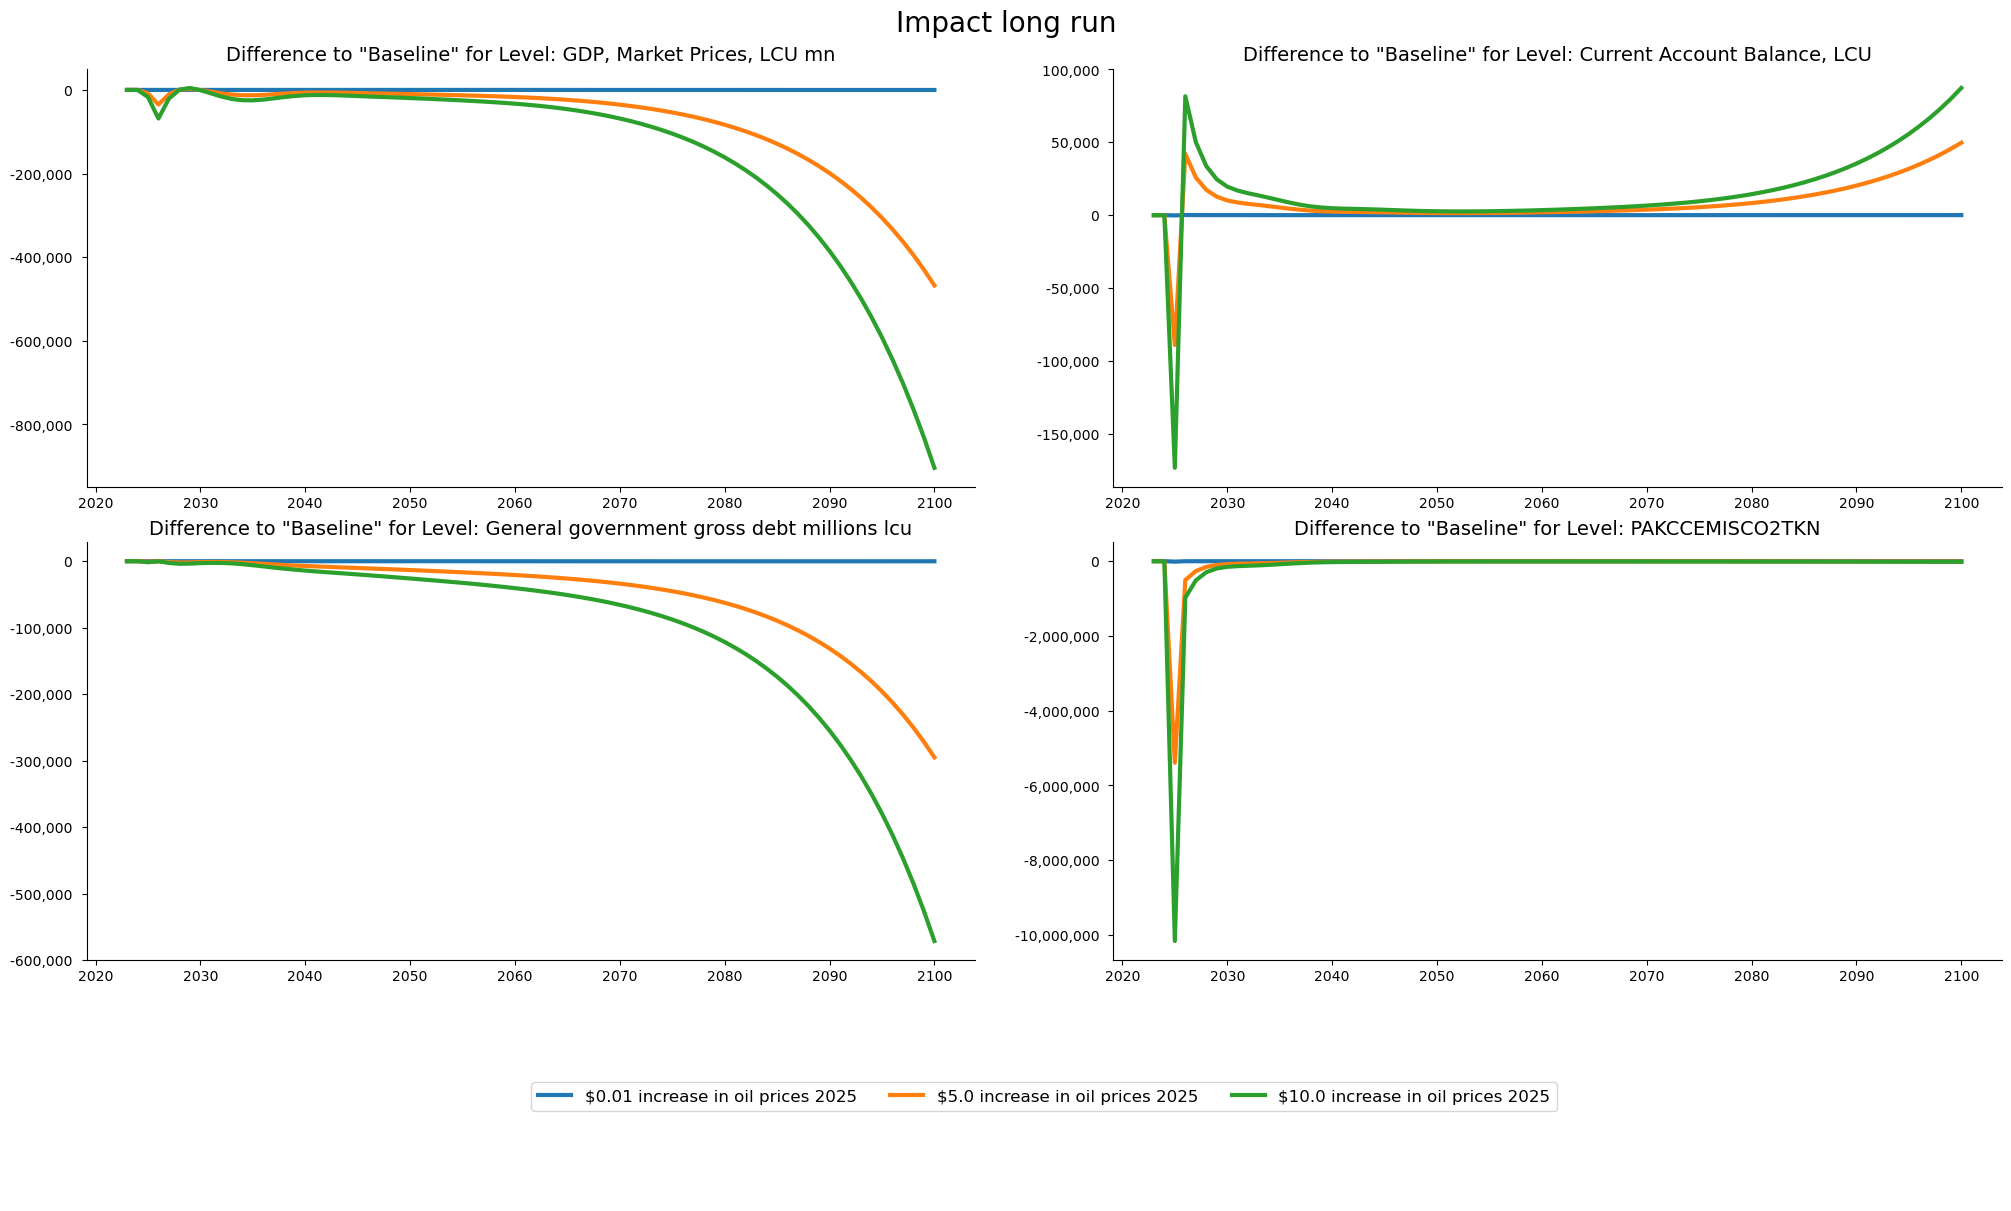

In [9]:
mpak.keep_plot(' PAKNYGDPMKTPCN PAKBNCABFUNDCN PAKGGDBTTOTLCN PAKCCEMISCO2TKN',
diff=True,start=2023,end=2100,samefig=1,legend=1,title='Impact long run');

In interpreting this, it's crucial to acknowledge that the local price level in the baseline grows significantly. Observing the percentage difference from the baseline reveals that measured in this way the response does not explode. So the real impact of the impulse does not explode. 

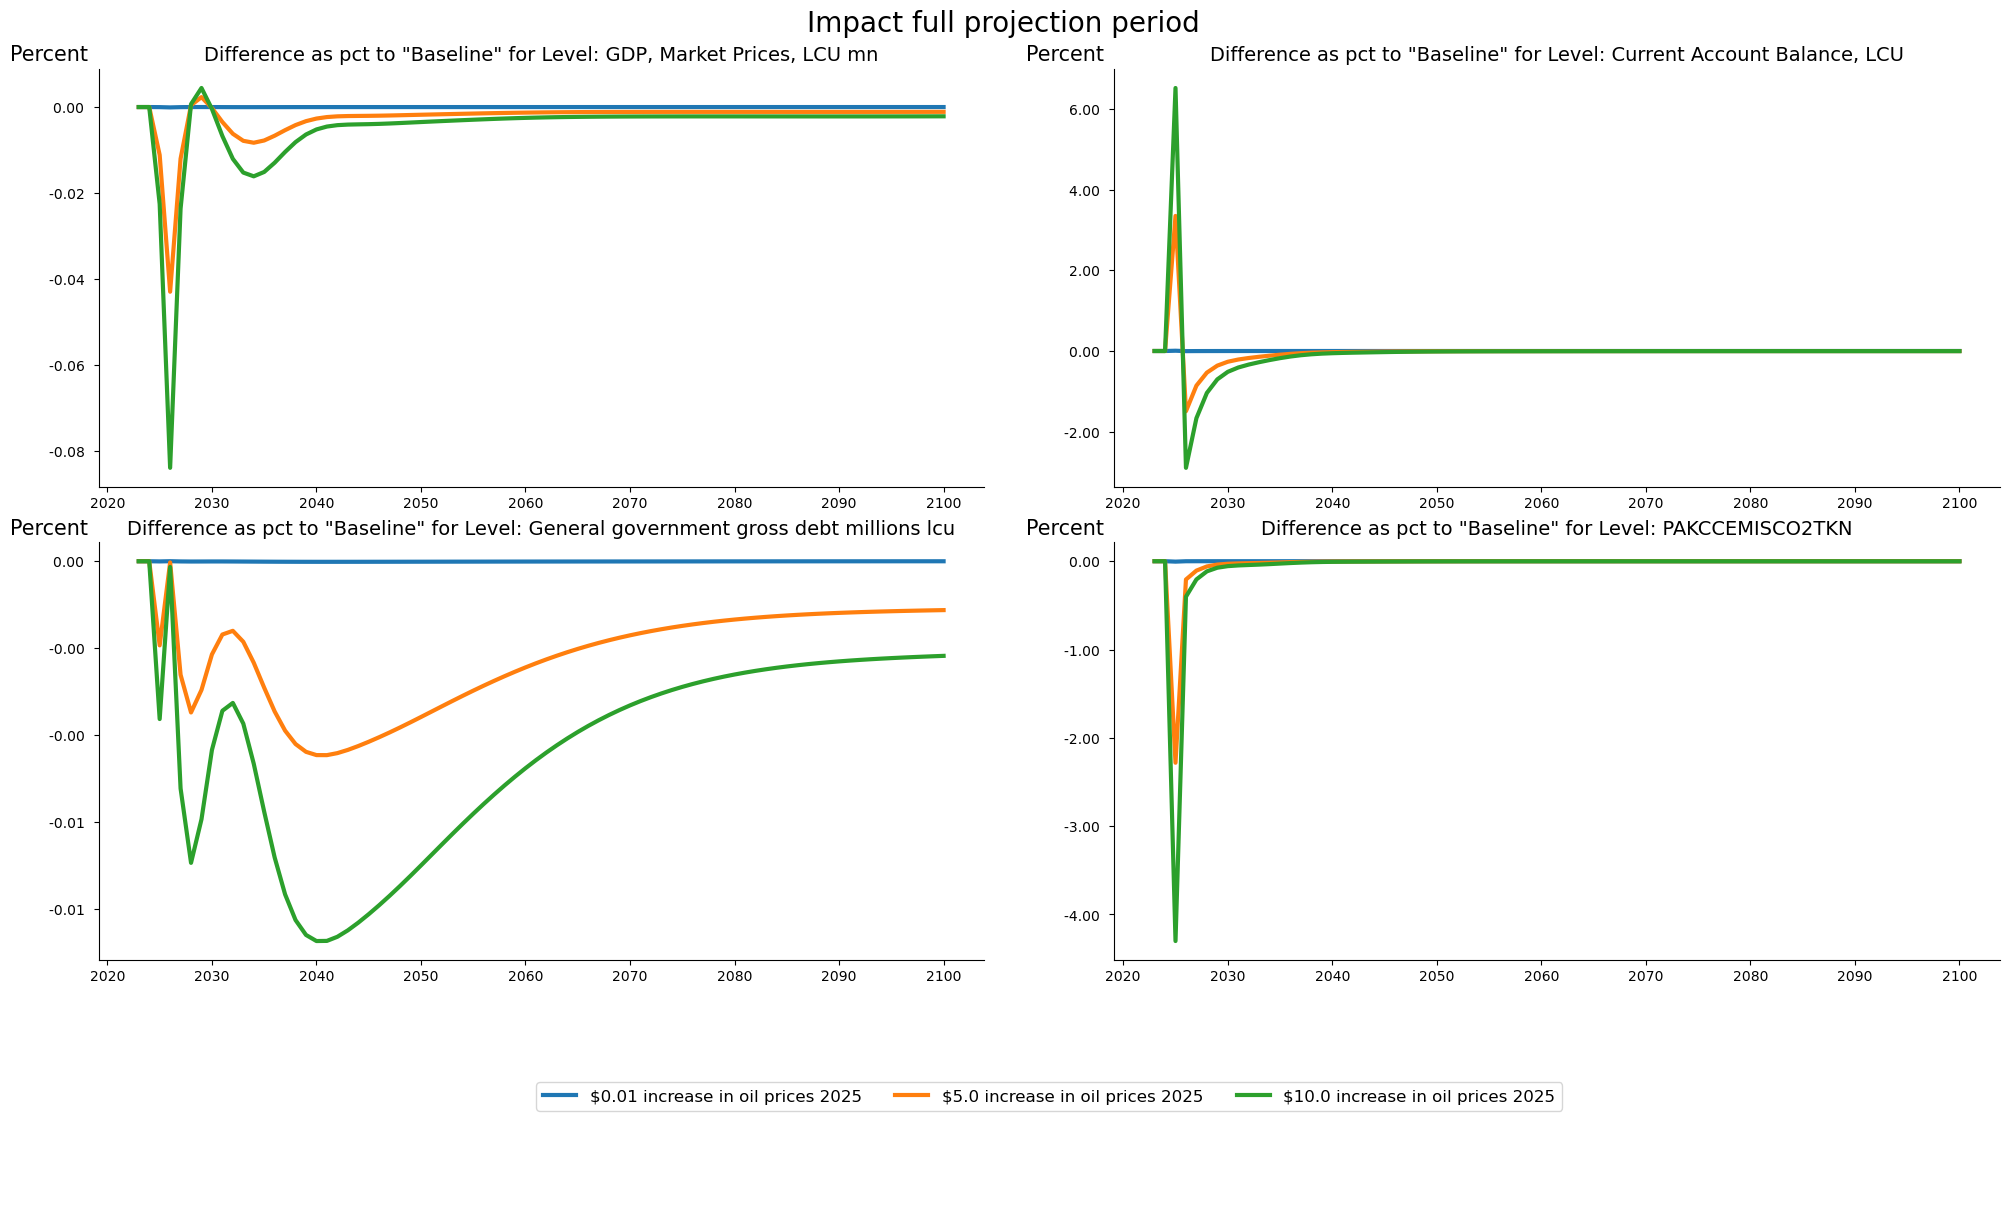

In [10]:
mpak.keep_plot(' PAKNYGDPMKTPCN PAKBNCABFUNDCN PAKGGDBTTOTLCN PAKCCEMISCO2TKN',
diffpct=True,start=2023,end=2100,samefig=1,legend=1,title='Impact full projection period');

### Short  run

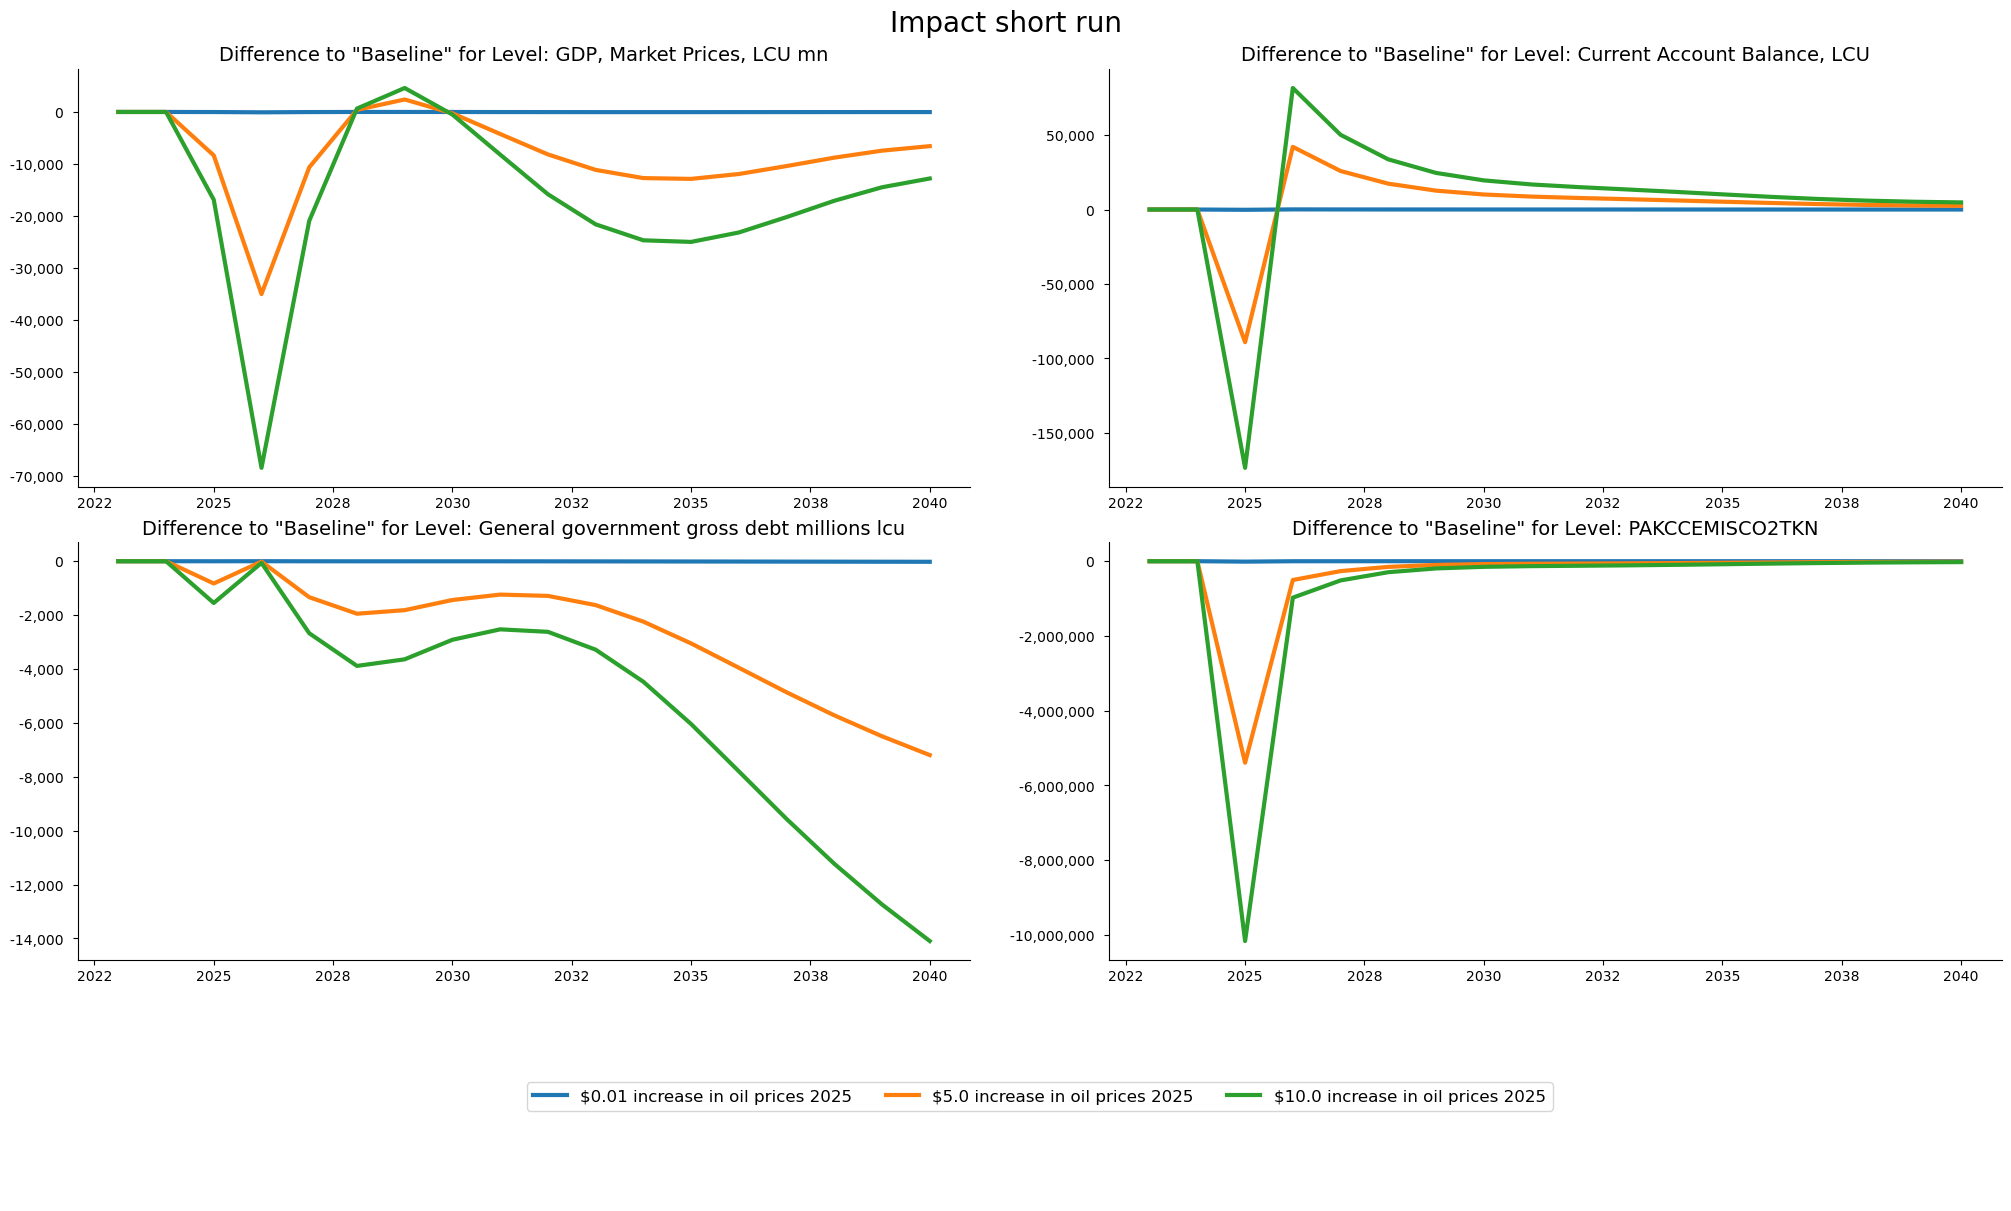

In [11]:
 mpak.keep_plot(' PAKNYGDPMKTPCN PAKBNCABFUNDCN PAKGGDBTTOTLCN PAKCCEMISCO2TKN'
,diff=True,start=2023,end=2040,samefig=1,legend=1,title='Impact short run');

## Summary:

This workbook focuses on analyzing eigenvalues and impulse responses to understand the stability and behavior of a dynamic model. Key aspects include:

- **Eigenvalues and Eigenvectors**: Eigenvalues and eigenvectors are useful for assessing the system's stability. Eigenvalues highlight the system's potential for growth, decay, or oscillation, while eigenvectors determine the direction of these dynamic changes.

- **Impulse Response Analysis**: This section explores the impulse responses of selected variables, showcasing their behavior through long-term trends and short-term oscillations. This method provides an understanding of how variables respond to external shocks.

- **Visualization**:The workbook presents tools for the detailed examination of eigenvalues and impulse responses.

- **On the Pakistan Model**: Initially, the model appears to exhibit an exploding impulse response. However, this primarily reflects price developments. When measured in relative terms, the impulse response does not explode but approaches zero.
